## Quick Info
Dataset link: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
<hr>
Dataset Column Descriptions

This dataset contains demographic, lifestyle, and medical information related to diabetes risk factors. Below is the explanation of each feature:
<hr>
<h2>Medical & Health Condition Features</h2>
<ul>

<li><b>high_bp</b> → Indicates if the person has high blood pressure.

0 = No | 1 = Yes</li>

<li><b>high_cholesterol</b> → Indicates if the person has high cholesterol levels.

0 = No | 1 = Yes</li>

<li><b>cholesterol_check</b> → Whether the person had a cholesterol check in the past 5 years.

0 = No | 1 = Yes</li>

<li><b>stroke</b> → Whether the person was ever told they had a stroke.

0 = No | 1 = Yes</li>

<li><b>heart_disease_or_attack</b> → History of coronary heart disease (CHD) or myocardial infarction (heart attack).

0 = No | 1 = Yes</li>

<li><b>general_health</b> → Self-reported overall health status.

1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor</li>

<li><b>mental_health</b> → Number of days in the past 30 days mental health was “not good” (stress, depression, emotional problems).

Scale: 0–30 days</li>

<li><b>physical_health</b> → Number of days in the past 30 days physical health was “not good” (illness or injury).

Scale: 0–30 days</li>

<li><b>walking_difficulty</b> → Serious difficulty in walking or climbing stairs.

0 = No | 1 = Yes</li>
</ul>
<hr>
<h2>Lifestyle Features</h2>
<ul>
<li><b>bmi</b> → Body Mass Index (numeric value, integer).</li>

<li><b>smoker</b> → Has the person smoked at least 100 cigarettes in their lifetime?

0 = No | 1 = Yes</li>

<li><b>physical_activity</b> → Did the person engage in any physical activity (outside of work) in the past 30 days?

0 = No | 1 = Yes</li>

<li><b>fruits</b> → Consumes fruits at least once per day.

0 = No | 1 = Yes</li>

<li><b>veggies</b> → Consumes vegetables at least once per day.

0 = No | 1 = Yes</li>

<li><b>heavy_alcohol_consumption</b> → Heavy drinkers (men >14 drinks/week, women >7 drinks/week).

0 = No | 1 = Yes</li>
</ul>
<hr>
<h2>Healthcare Access Features</h2>
<ul>
<li><b>any_healthcare</b> → Has some form of health coverage (insurance, HMO, prepaid plan, etc.).

0 = No | 1 = Yes</li>

<li><b>no_doctor_cost</b> → In the past 12 months, was there a time the person needed to see a doctor but could not due to cost?

0 = No | 1 = Yes</li>
</ul>
<hr>
<h2>Demographics</h2>
<ul>
<li><b>sex</b> → Gender of the respondent.

0 = Female | 1 = Male</li>

<li><b>age</b> → Age category (13 grouped levels).

1 = 18–24, 2 = 25–29, ..., 9 = 60–64, ..., 13 = 80+</li>

<li><b>income</b> → (If included in dataset) Annual household income categories.

Typically from 1 = <$10,000 to 8 = $75,000+ (codebook dependent).</li>

<li><b>education</b> → (If included) Education level of respondent.

1 = Never attended school → 6 = College 4 years or more</li>
<hr>
</ul>
<h2><b>Target Variable</b></h2>
<ul>
<li>has_diabetes → Outcome variable.

0 = No diabetes | 1 = Prediabetes or Diabetes</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset 

In [2]:
df = pd.read_csv("./dataset/real_world_diabetes_data.csv")
df.sample(5)

,High BP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,Heart Disease or Attack,Physical Activity,Fruits,Veggies,...,No Doctor Cost,General Health,Mental Health,Physical Health,Walking Difficulty,Sex,Age,Education,Income,Has_Diabetes
47156,0,1,1,27,0,0,0,1,1,1,...,0,3,0,4,0,0,9,6,6,0
145868,0,1,1,59,1,0,0,0,0,1,...,0,4,30,25,1,0,6,3,2,1
23558,0,0,1,23,0,0,0,1,1,1,...,0,1,0,0,0,0,6,6,8,0
100319,0,0,1,24,0,0,0,1,0,0,...,0,5,0,30,1,1,11,5,4,0
237452,0,0,1,25,1,0,1,0,1,0,...,0,4,0,10,1,0,11,3,2,0


In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['High BP', 'High Cholesterol', 'Cholesterol Check', 'BMI', 'Smoker',
       'Stroke', 'Heart Disease or Attack', 'Physical Activity', 'Fruits',
       'Veggies', 'Heavy Alcohol Consumption', 'Any Healthcare',
       'No Doctor Cost', 'General Health', 'Mental Health', 'Physical Health',
       'Walking Difficulty', 'Sex', 'Age', 'Education', 'Income',
       'Has_Diabetes'],
      dtype='object')

In [5]:
df = df.drop(["Education", "Income"], axis=1) 

In [6]:
df.shape

(253680, 20)

In [7]:
df.columns

Index(['High BP', 'High Cholesterol', 'Cholesterol Check', 'BMI', 'Smoker',
       'Stroke', 'Heart Disease or Attack', 'Physical Activity', 'Fruits',
       'Veggies', 'Heavy Alcohol Consumption', 'Any Healthcare',
       'No Doctor Cost', 'General Health', 'Mental Health', 'Physical Health',
       'Walking Difficulty', 'Sex', 'Age', 'Has_Diabetes'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.sample(5)

,high_bp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,veggies,heavy_alcohol_consumption,any_healthcare,no_doctor_cost,general_health,mental_health,physical_health,walking_difficulty,sex,age,has_diabetes
230659,0,0,0,21,1,0,0,1,0,1,0,1,0,2,0,3,0,0,4,0
34152,0,0,1,29,1,0,0,1,1,1,0,1,0,1,0,0,0,0,9,0
1145,0,0,1,31,1,0,0,1,0,1,0,1,0,3,0,14,0,1,13,0
102791,1,0,1,27,0,0,0,1,1,1,0,1,0,3,0,0,0,1,4,0
13117,0,0,1,37,1,0,1,0,0,0,0,1,1,4,30,30,1,0,4,0


In [9]:
df.columns

Index(['high_bp', 'high_cholesterol', 'cholesterol_check', 'bmi', 'smoker',
       'stroke', 'heart_disease_or_attack', 'physical_activity', 'fruits',
       'veggies', 'heavy_alcohol_consumption', 'any_healthcare',
       'no_doctor_cost', 'general_health', 'mental_health', 'physical_health',
       'walking_difficulty', 'sex', 'age', 'has_diabetes'],
      dtype='object')

## Perform Exploratory Data Analysis (EDA) 

In [10]:
df.isna().sum()

high_bp                      0
high_cholesterol             0
cholesterol_check            0
bmi                          0
smoker                       0
stroke                       0
heart_disease_or_attack      0
physical_activity            0
fruits                       0
veggies                      0
heavy_alcohol_consumption    0
any_healthcare               0
no_doctor_cost               0
general_health               0
mental_health                0
physical_health              0
walking_difficulty           0
sex                          0
age                          0
has_diabetes                 0
dtype: int64

In [11]:
pct_count = df["has_diabetes"].value_counts(normalize=True) * 100
pct_count

has_diabetes
0    86.066698
1    13.933302
Name: proportion, dtype: float64

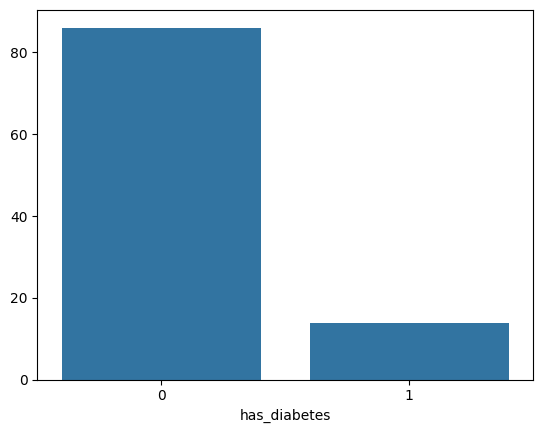

In [12]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

In [13]:
df.dtypes

high_bp                      int64
high_cholesterol             int64
cholesterol_check            int64
bmi                          int64
smoker                       int64
stroke                       int64
heart_disease_or_attack      int64
physical_activity            int64
fruits                       int64
veggies                      int64
heavy_alcohol_consumption    int64
any_healthcare               int64
no_doctor_cost               int64
general_health               int64
mental_health                int64
physical_health              int64
walking_difficulty           int64
sex                          int64
age                          int64
has_diabetes                 int64
dtype: object

In [14]:
df.describe()

,high_bp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,veggies,heavy_alcohol_consumption,any_healthcare,no_doctor_cost,general_health,mental_health,physical_health,walking_difficulty,sex,age,has_diabetes
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,1.000000


<h4>Body Mass Index(BMI) Categories overview</h4>
<ol>
    <li>Underweight: less than <b>18.5</b></li>
    <li>Normal Weight: between <b>18.5 and 24.9</b></li>
    <li>Overweight: between <b>25 and 29.9</b></li>
    <li>Obesity: <b>30 or higher</b>
        <ul>
            <li><b>Class 1 (Moderate Obesity)</b>: BMI between <b>30 and 34.9.</b></li>
            <li><b>Class 2 (Severe Obesity)</b>: BMI between <b>35 and 39.9.</b></li>
            <li><b>Class 3 (Very Severe or Morbid Obesity)</b>: BMI of <b>40 or higher.</b></li>
        </ul>
    </li>
</ol>

reference link: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

[]

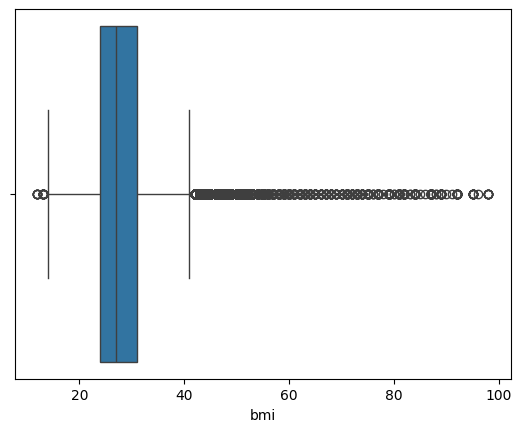

In [15]:
sns.boxplot(x = df["bmi"])
plt.plot()

### Use Quantile for handling outliers 

In [16]:
def get_iqr_bounds(col):
    Q1, Q3 =  col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [17]:
lower_bound, upper_bound = get_iqr_bounds(df["bmi"])
lower_bound, upper_bound

(13.5, 41.5)

In [18]:
quantile_threold = df["bmi"].quantile(0.95)
quantile_threold

np.float64(40.0)

In [19]:
df.shape

(253680, 20)

In [20]:
df1 = df[df["bmi"] <= quantile_threold].copy()
df1.shape

(242201, 20)

In [21]:
df['bmi'] = np.where(df['bmi'] > upper_bound, upper_bound,
            np.where(df['bmi'] < lower_bound, lower_bound, df['bmi']))

In [22]:
df['bmi'].describe()

count    253680.000000
mean         28.107247
std           5.562154
min          13.500000
25%          24.000000
50%          27.000000
75%          31.000000
max          41.500000
Name: bmi, dtype: float64

[]

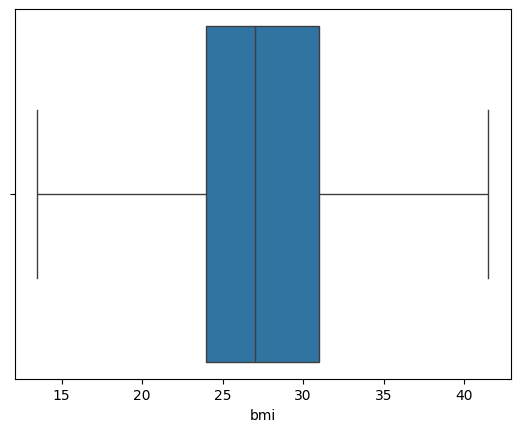

In [23]:
sns.boxplot(x = df["bmi"])
plt.plot()

In [24]:
df.shape

(253680, 20)

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'has_diabetes' in numeric_cols:
    numeric_cols.remove('has_diabetes')
numeric_cols

['high_bp',
 'high_cholesterol',
 'cholesterol_check',
 'bmi',
 'smoker',
 'stroke',
 'heart_disease_or_attack',
 'physical_activity',
 'fruits',
 'veggies',
 'heavy_alcohol_consumption',
 'any_healthcare',
 'no_doctor_cost',
 'general_health',
 'mental_health',
 'physical_health',
 'walking_difficulty',
 'sex',
 'age']

### View value distribution for each columns

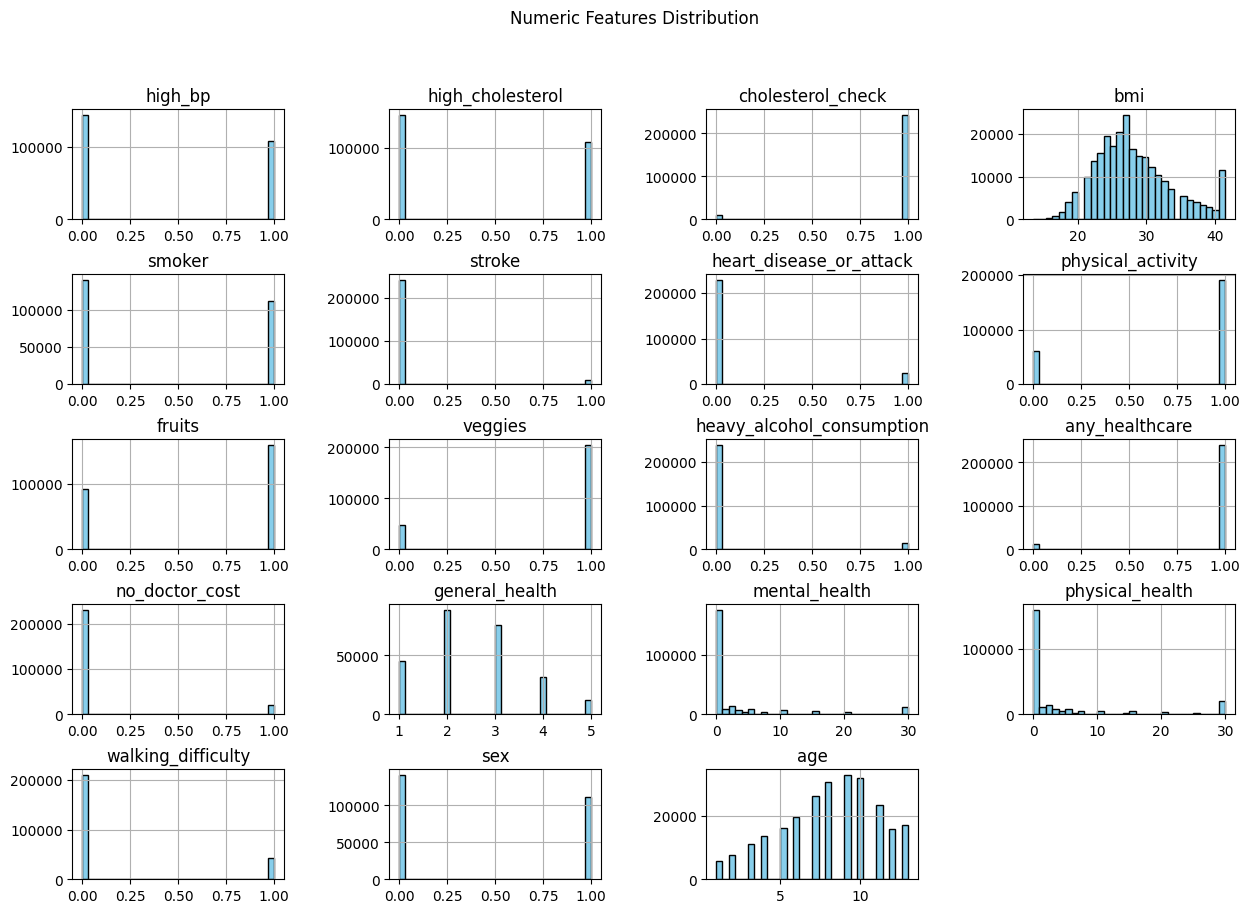

In [26]:
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Numeric Features Distribution', fontsize=12)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Checking correlation between columns

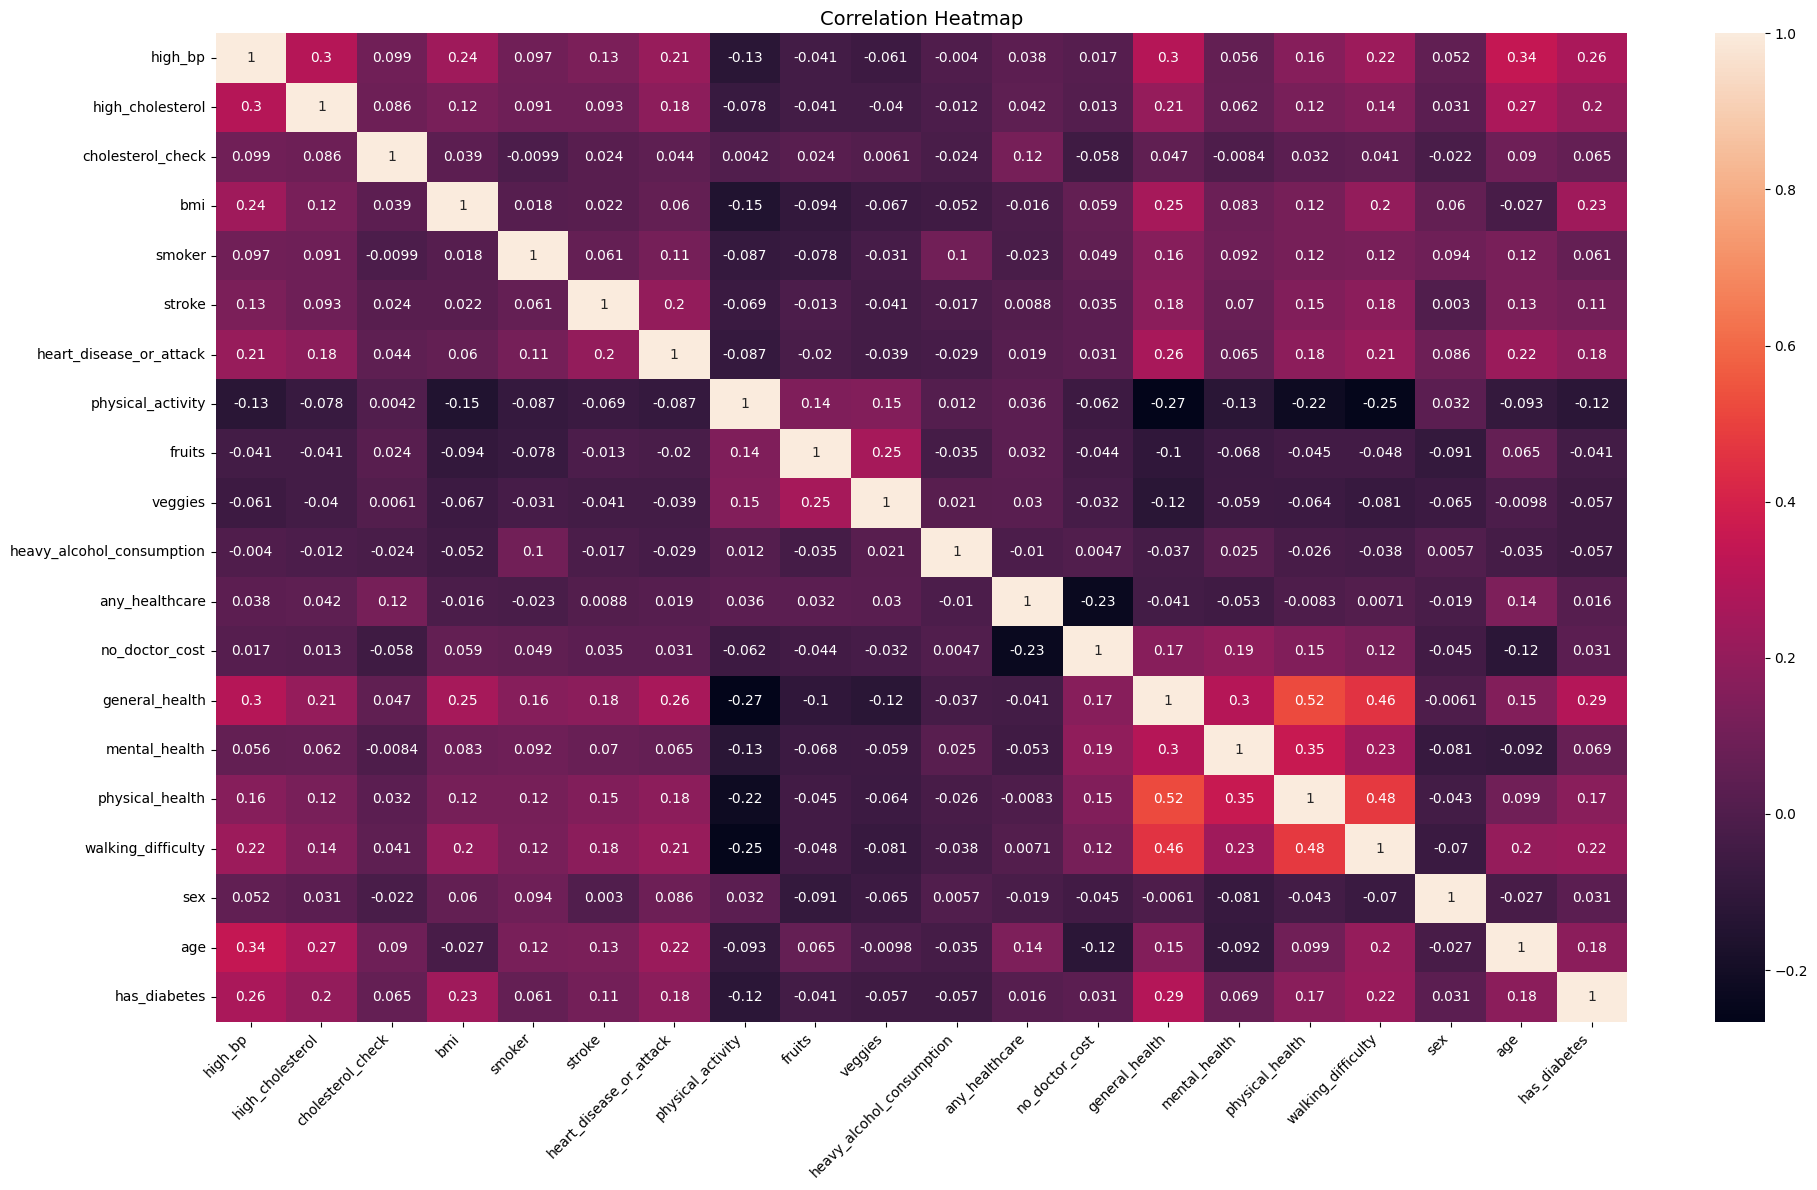

In [27]:
corr = df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

## Feature Engineering

In [28]:
X = df.drop(["has_diabetes"], axis=1)
y = df["has_diabetes"]

In [29]:
X.describe()

,high_bp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,veggies,heavy_alcohol_consumption,any_healthcare,no_doctor_cost,general_health,mental_health,physical_health,walking_difficulty,sex,age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.107247,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119
std,0.494934,0.494210,0.189571,5.562154,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


### Perform the Variance Inflation Factor to know the correlation with the target variable.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [32]:
calculate_vif(X)

,Column,VIF
0,high_bp,2.269040
1,high_cholesterol,2.029322
2,cholesterol_check,22.009516
3,bmi,21.614318
4,smoker,1.926337
5,stroke,1.125353
6,heart_disease_or_attack,1.287349
7,physical_activity,4.452443
8,fruits,3.010491
9,veggies,5.606351


In [33]:
calculate_vif(X.drop(["cholesterol_check", "any_healthcare"], axis = 1))

,Column,VIF
0,high_bp,2.248576
1,high_cholesterol,2.028480
2,bmi,14.699902
3,smoker,1.925393
4,stroke,1.125348
5,heart_disease_or_attack,1.285228
6,physical_activity,4.181378
7,fruits,2.983557
8,veggies,5.431590
9,heavy_alcohol_consumption,1.076040


<p style = "font-size: 18px;">The <b>Variance Inflation Factor (VIF)</b> is a measure used in regression analysis to assess the severity of multicollinearity among predictor variables
</p><br>
<p style = "font-size: 18px;">Here, we use VIF as EDA, not a hard pruning rule. Because VIF is crucial for <b>linear models</b>, but <b>tree ensembles (RF/XGB)</b> are largely robust to <b>multicollinearity</b>(close link between variables is called 'multicollinearity').</p><br>
<p style = "color: blue; font-size: 18px;">*Note: According to industry standards, the Variance Inflation Factor (VIF) should be less than 10. However, our target value does not follow a linear pattern; we are dealing with non-linearity. Therefore, while a VIF value exceeding 10 is acceptable, the values should ideally be close to 10.*</p><br>
<p style = "color: #570861; font-size: 18px;">Essentially, a high VIF indicates that a predictor variable is highly correlated with other predictor variables in the model, potentially leading to unstable and unreliable regression results. </p>

In [34]:
X_reduced = X.drop(["cholesterol_check", "any_healthcare"], axis= 1)
X_reduced.sample(5)

,high_bp,high_cholesterol,bmi,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,veggies,heavy_alcohol_consumption,no_doctor_cost,general_health,mental_health,physical_health,walking_difficulty,sex,age
181192,0,0,25.0,0,0,0,1,1,1,0,0,1,0,0,0,1,5
211704,0,0,23.0,1,0,0,0,1,1,0,1,2,30,30,1,1,13
186824,0,0,30.0,0,0,0,1,1,1,0,0,1,0,0,0,0,11
179122,1,0,26.0,0,0,0,0,1,1,0,0,1,0,0,0,0,11
124775,0,0,37.0,0,0,0,1,0,1,0,0,1,1,0,0,0,9


## Model Training

## We use classification models here

<p>We use these three classification models here:</p>
<ul>
    <li>DecisionTreeClassifier</li>
    <li>RandomForestClassifier</li>
    <li>XGBClassifier</li>
</ul>

In [35]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)

print(f"X train {X_train.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y test {y_test.shape}")

X train (202944, 17)
X test (50736, 17)
Y train (202944,)
Y test (50736,)


### DecisionTreeClassifier

In [37]:
dt_params = {
    "criterion": "gini",       # or "entropy", gini is faster
    "max_depth": 6,            # limits overfitting
    "min_samples_split": 20,   # minimum samples to split a node
    "min_samples_leaf": 10,    # leaf must have at least 10 samples
    "class_weight": "balanced",# handles class imbalance
    "random_state": 42
}

tree_model = DecisionTreeClassifier(**dt_params)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [38]:
test_score = tree_model.score(X_test, y_test) * 100
train_score = tree_model.score(X_train, y_train) * 100
train_score, test_score

(73.27883554083886, 73.27341532639547)

In [39]:
y_pred = tree_model.predict(X_test)

In [40]:
tree_report = classification_report(y_test, y_pred)
print("\nDecisionTreeClassifer model classification report \n")
print(tree_report)


DecisionTreeClassifer model classification report 

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     43739
           1       0.31      0.75      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



In [41]:
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = np.sqrt(mse_tree)
print(f"Decision Tree ==> MSE: {mse_tree} RMSE: {rmse_tree}")

Decision Tree ==> MSE: 0.2672658467360454 RMSE: 0.5169776075770066


### RandomForestClassifier

In [42]:
rf_params = {
    "n_estimators": 300,       # number of trees
    "max_depth": 8,            # limit tree depth
    "min_samples_split": 20,
    "min_samples_leaf": 10,
    "class_weight": "balanced_subsample",  # better for imbalance
    "random_state": 42,
    "n_jobs": -1               # use all CPU cores
}


forest_model = RandomForestClassifier(**rf_params)
forest_model.fit(X_train, y_train)
test_score = forest_model.score(X_test, y_test) * 100
train_score = forest_model.score(X_train, y_train) * 100
train_score, test_score

(72.50867234310942, 72.31945758435825)

In [43]:
y_pred = forest_model.predict(X_test)

In [44]:
forest_report = classification_report(y_test, y_pred)
print("\nRandom Forest model classification report \n")
print(forest_report)


Random Forest model classification report 

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     43739
           1       0.31      0.79      0.44      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.87      0.72      0.76     50736



In [45]:
mse_forest = mean_squared_error(y_test, y_pred)
rmse_forest = np.sqrt(mse_forest)
print(f"Random Forest ==> MSE: {mse_forest} RMSE: {rmse_forest}")

Random Forest ==> MSE: 0.2768054241564175 RMSE: 0.5261230123805815


### XGBoost Classifier

In [46]:
xgb_params = {
    "n_estimators": 300,
    "max_depth": 5,
    "learning_rate": 0.1,
    "subsample": 0.8,          # row sampling
    "colsample_bytree": 0.8,   # column sampling
    "scale_pos_weight": (218334 / 35346), # imbalance handling
    "random_state": 42,
    "n_jobs": -1,
    "eval_metric": "logloss",
}

xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
train_score = xgb_model.score(X_train, y_train) * 100
test_score = xgb_model.score(X_test, y_test) * 100
train_score, test_score

(72.88315988647115, 72.27806685588143)

In [47]:
y_pred = xgb_model.predict(X_test)

In [48]:
xgb_report = classification_report(y_test, y_pred)
print("\nXGBoost model classification report \n")
print(xgb_report)


XGBoost model classification report 

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     43739
           1       0.31      0.79      0.44      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.87      0.72      0.76     50736



In [49]:
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost ==> MSE: {mse_xgb} RMSE: {rmse_xgb}")

XGBoost ==> MSE: 0.27721933144118577 RMSE: 0.5265162214416435


### Cross fold validation 

In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in {
    "DecisionTree": tree_model,
    "RandomForest": forest_model,
    "XGBoost": xgb_model
}.items():
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy")
    print(f"{name} mean CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

DecisionTree mean CV accuracy: 0.7217 ± 0.0112
RandomForest mean CV accuracy: 0.7235 ± 0.0019
XGBoost mean CV accuracy: 0.7235 ± 0.0019


### XGBoost Classifier with new parameters

In [51]:
xgb_model = XGBClassifier(
    random_state=42,
    n_jobs=-1, # Here "-1" means use all available cores → fastest training.
    eval_metric='logloss',

    # Tree depth and complexity
    max_depth=5,            # Limit depth to avoid overfitting
    min_child_weight=1,     # Smaller = more sensitive to small patterns

    # Sampling to generalize better
    subsample=0.8,
    colsample_bytree=0.8,

    # Learning rate & estimators
    learning_rate=0.05,     # Lower rate + more trees = better generalization
    n_estimators=500, # Number of trees

    # Regularization to reduce noise
    reg_lambda=1,           # L2 regularization [Panelized large weight → Prevents overfitting]
    reg_alpha=0,            # L1 regularization [shrinks some weights to 0] (not applied here)

    # Class imbalance handling
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]) 
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

Why do we use "scale_pos_weight" here?

because our dataset is imbalanced (≈ 86% non-diabetic (0) vs 14% diabetic (1)).

Without correction, the model always favors predicting “0”.

<b>scale_pos_weight</b><br>
→ Formula = (# negatives / # positives).<br>
→ Example: if 43,739 “0” and 6,997 “1” → ratio ≈ 6.25.<br>
→ This tells XGBoost:
“Hey, a diabetic sample (1) is ~6 times more important than a non-diabetic (0).”<br>
→ Effect = model pays more attention to the minority class (diabetes).

In [52]:
train_score = xgb_model.score(X_train, y_train) * 100
test_score = xgb_model.score(X_test, y_test) * 100
train_score, test_score

(72.78017581204668, 72.2524440239672)

In [54]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9565    0.7105    0.8153     43739
           1     0.3060    0.7979    0.4423      6997

    accuracy                         0.7225     50736
   macro avg     0.6312    0.7542    0.6288     50736
weighted avg     0.8668    0.7225    0.7639     50736



### Thresold recall score

In [55]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.35  # default is 0.5, lowering improves recall
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom, digits=4))

              precision    recall  f1-score   support

           0     0.9746    0.5747    0.7231     43739
           1     0.2543    0.9065    0.3972      6997

    accuracy                         0.6205     50736
   macro avg     0.6145    0.7406    0.5601     50736
weighted avg     0.8753    0.6205    0.6781     50736



<b>Why we use 35% thresold</b>
<ul>
<li>Normally, ML models classify as 1 if probability ≥ 0.5.</li>

<li>You lowered the threshold to 0.35, meaning:
→ If the model is at least 35% confident, we’ll say the person has diabetes.</li>

<li>This increases recall (catching more positives), but reduces precision (more false alarms).</li>
</ul>

### Feature Importance

<Figure size 1000x600 with 0 Axes>

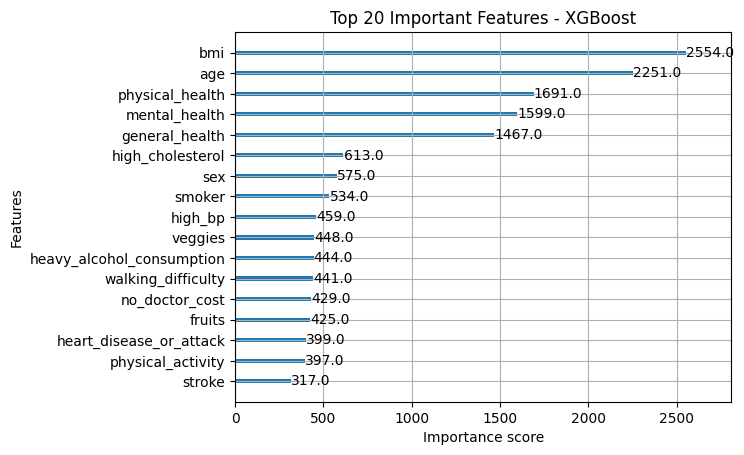

In [56]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=20)
plt.title("Top 20 Important Features - XGBoost")
plt.show()

In [57]:
from joblib import dump

In [58]:
dump(xgb_model, "./model/diabetes_prediction_model_v1.joblib")

['./model/diabetes_prediction_model_v1.joblib']

<p style="color: blue; font-size: 18px">We can conclude that our model has a balanced fit, achieving a recall rate of <strong>91%</strong>, which is quite good for the <b>medical domain</b>. Additionally, our analysis of the dataset reveals that <b>"BMI," "Age," "Physical Health," "Mental Health," and "General Health"</b> show strong correlations with <b>diabetes</b>.</p>

<p style="color: #570861; font-size: 18px">Our model is very effective for <b>screening diabetes (high recall)</b>, but it needs improvement in reducing <b>false positives (low precision).</b></p><br>

## Version 2: [Update]

In this, add some mode EDA operations, keep "Education" and "Income" column and many other stuff, at last perform Error Analysis on final model's prediction.

Use SMOTE-TOMEK technique to handle class imbalance.